November: Part 3 - This notebook is a continuation of gyre_runs.ipynb and gyre_runs_mackenzie01.ipynb. The configuration used to produce these results is gyre_mackenzie02. Parameters explored: ln_tsd_init, ln_tsd_tradmp, sn_tem, sn_sal.

Changes since Part 2:
* matlab scaling factors script has transposed lons and lats so it won't flip the dimensions
* masking land using [Nancy notebook](http://nbviewer.jupyter.org/urls/bitbucket.org/salishsea/analysis-nancy/raw/tip/notebooks/Masking%20with%20tmask.ipynb)
* now, we have the realistic bathymetry that matches the idealized bathymetry
* the idealized bathymetry has been refined (slope)
* the stratification based on Arctic data is inputted into the model

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/modules/')
import functions_plot

from salishsea_tools import nc_tools

In [21]:
def plot_gyre_times(gridT, var, depth_ind, time_inds, cmin, cmax, cmaps, max_min):
    cmaps.set_bad('wheat')
    fig, ax = plt.subplots(1, len(time_inds), figsize=(20, 4), sharex=True, sharey=True)
    for i, n in zip(time_inds, np.arange(len(time_inds))):
        if max_min == True:
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps, vmin = cmin, vmax = cmax)
            if n == 0:
                cbar = fig.colorbar(c, ax=ax[0])
        elif max_min == False:
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps)
            cbar = fig.colorbar(c, ax=ax[n])
        timestamp = nc_tools.timestamp(gridT,i).format('HH:mm (MM/DD)')
        ax[n].set_title(timestamp, fontsize=16)
        ax[n].set_xlim(0,gridT.dimensions['x'].size)
        ax[n].set_ylim(0,gridT.dimensions['y'].size)
        ax[0].set_ylabel('depth = ' + str(int(gridT['deptht'][depth_ind])) + 'm', fontsize=16)
    fig.tight_layout()
    return fig

def plot_scenarios(gridT, var_model, time_ind, depth_ind, cmin, cmax, cmaps, max_min, titles):
    cmaps.set_bad('wheat')
    fig, ax = plt.subplots(1, 4, figsize=(20, 4), sharex=True, sharey=True)
    for n, var, ttl in zip(np.arange(4), var_model, titles):
        if max_min == True:
            c = ax[n].pcolormesh(var[time_ind,depth_ind,:,:], cmap=cmaps, vmin = cmin, vmax = cmax) 
            if n == 0:
                cbar = fig.colorbar(c, ax=ax[0])
        elif max_min == False:
            c = ax[n].pcolormesh(var[time_ind,depth_ind,:,:], cmap=cmaps)
            cbar = fig.colorbar(c, ax=ax[n])
        ax[n].set_xlim(0,gridT.dimensions['x'].size)
        ax[n].set_ylim(0,gridT.dimensions['y'].size)
        ax[n].set_title(ttl, fontsize=16)
    timestamp = nc_tools.timestamp(gridT,time_ind).format('HH:mm (MM/DD)')
    ax[0].set_ylabel(timestamp, fontsize=16)
    fig.tight_layout()
    return fig

## Summary


* cp_cfg name
* bathy_meter.nc and coordinates.nc
* nn_bathy = 1 (0 for compute)
* jphgr_msh = 0 (5 for gyre)
* jperio = 1 (cyclic)
* ln_zco, ln_zps
* jpidta = jpiglo, jpjdta = jpjglo, jpkdta 


|Parameter      |Run01 (Id)|Run01 (Re)|
|---------------|----------|----------|
|cp_cfg         |ideal     |real      |
|ln_bt_nn_auto  |False     |True      |
|rn_bt_cmax     |NA        |0.05      |
|rn_rdt         |20        |10        |
|nn_baro        |4         |NA        |
|calc nn_baro   |NA        |5         |
|nn_itend       |2160 (12h)|4320 (12h)|
|nn_write       |360 (1h)  |---       |
|nn_tau000 [ts] |540 (3h)  |1080      |
|rn_utau0 [N/m2]|-5.0      |-5.0      |
|rn_vtau0 [N/m2]|0         |0         |
|status         | ✓(2160)  | ✓ (4320) |

* under these nn_itend and nn_write, the stages where the code can fail are [1, 361, 721, 1081, 1441, 1801]
* from Part 2, remember you have to reduce timestep and then consider the wind forcing

In [14]:
# calculate nn_baro using rn_rdt and cmax
g = 9.81; cmax = 0.05; dx = 4501; H = 1300; dt_clinic = 10 #(rn_rdt)
u = np.sqrt(g * H)
dt_tropic = (cmax * dx) / u
iterations = dt_clinic / dt_tropic
iterations

5.0179596244528888

# Run01: Idealized vs Realistic

These runs use a configuration similar to the ones that are proven to run from gyre_runs_mackenzie01.ipynb. Both runs try to simulate the same scenario. The realistic needed a smaller timestep so nn_itend and nn_tau were modified to accommodate this change. The original gyre stratification was used.

1. mackenzie_canyon/bathymetry/initial_sets/idealized/**ideal_bathy_01.nc**
2. mackenzie_canyon/bathymetry/initial_sets/realistic/**real_bathy_01.nc**
3. mackenzie_canyon/bathymetry/initial_sets/coordinates/**coords_01.nc**

In [15]:
path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run01'
gridT_I, lon_I, lat_I, tem_I, sal_I, ssh_I, U_I, V_I, W_I = functions_plot.load_model_output(path, cfg)
mesh_I = nc.Dataset(path+cfg+'/mesh_mask.nc')

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_realistic/Run01'
gridT_R, lon_R, lat_R, tem_R, sal_R, ssh_R, U_R, V_R, W_R = functions_plot.load_model_output(path, cfg)
mesh_R = nc.Dataset(path+cfg+'/mesh_mask.nc')

### U Velocity

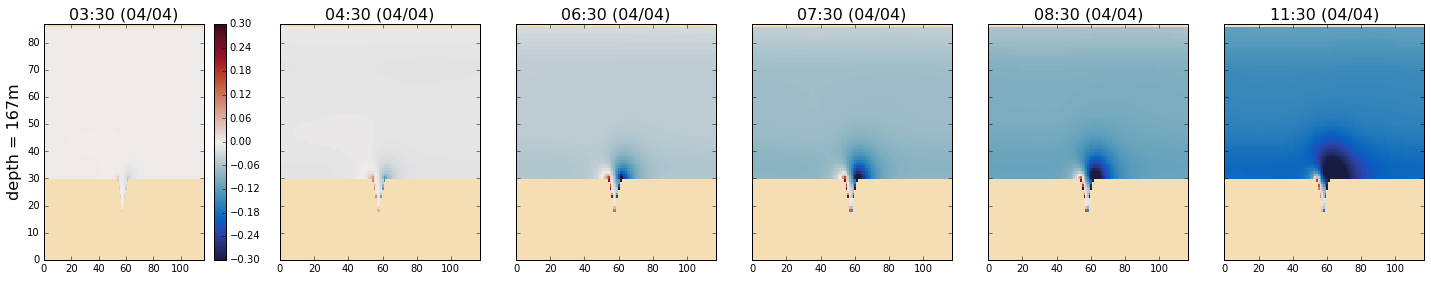

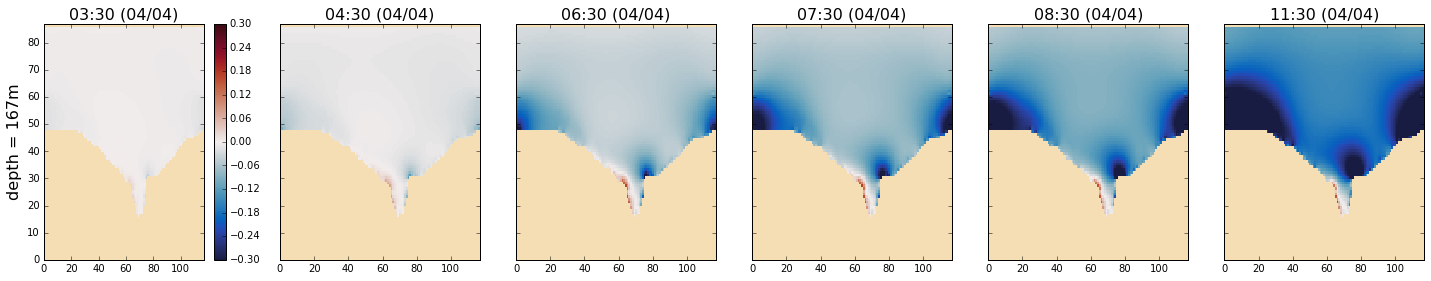

In [16]:
time_inds = [3,4,6,7,8,11]
max_min = True
bd = 0.3
fig = plot_gyre_times(gridT_I, U_I, 10, time_inds, -bd, bd, cmo.cm.balance, max_min)
fig = plot_gyre_times(gridT_R, U_R, 10, time_inds, -bd, bd, cmo.cm.balance, max_min)

# Run02: Arctic Stratification

These runs have the **same configurations** as Run01 and still use **ideal_bathy_01.nc**, **real_bathy_01.nc**, and **coords_01.nc**. What's new is that these runs use the temperature and salinity files created in prepare_stratification.ipynb.

1. mackenzie_canyon/conditions/stratification_files/**temp_strat.nc** & **temp_strat_real.nc**
2. mackenzie_canyon/conditions/stratification_files/**salt_strat.nc** & **temp_strat_real.nc**

### Notes
(Pages 67 and 129) In namtsd, **ln_tsd_init** and **ln_tsd_tradmp** are True and **sn_tem** and **sn_sal** are:

| Parameter             | Description | Values|
|-----------------------|-------------|-------|
| File name             |can include directory, doesn't have to have .nc| 'temp_strat', 'salt_strat'|
| Record frequency      |contained in input file, +ive if hours, -ive if months, integer| 1|
| Variable name         |'votemper', 'vosaline'| 'votemper', 'vosaline'|
| Time interpolation    |false if forcing remains constant during each forcing period| false|
| Climatological forcing|true if input file contains climatological forcing which can be cycled in time| true|
| Open/close frequency  |forcing files have data from the beginning of one 'daily','weekLLL','monthly','yearly'| 'yearly'|


In [5]:
path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run02'
gridT_SI, lon_SI, lat_SI, tem_SI, sal_SI, ssh_SI, U_SI, V_SI, W_SI = functions_plot.load_model_output(path, cfg)
mesh_SI = nc.Dataset(path+cfg+'/mesh_mask.nc')

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_realistic/Run02'
gridT_SR, lon_SR, lat_SR, tem_SR, sal_SR, ssh_SR, U_SR, V_SR, W_SR = functions_plot.load_model_output(path, cfg)
mesh_SR = nc.Dataset(path+cfg+'/mesh_mask.nc')

### Comparing gyre and Arctic Stratification

In [11]:
time_ind = 6
depth_ind = 7
cmaps = cmo.cm.balance

temps = [tem_I, tem_R, tem_SI, tem_SR]
salts = [sal_I, sal_R, sal_SI, sal_SR]
Us = [U_I, U_R, U_SI, U_SR]
Vs = [V_I, V_R, V_SI, V_SR]
Ws = [W_I, W_R, W_SI, W_SR]
titles = ['Ideal Gyre', 'Real Gyre', 'Ideal Arctic', 'Real Arctic']

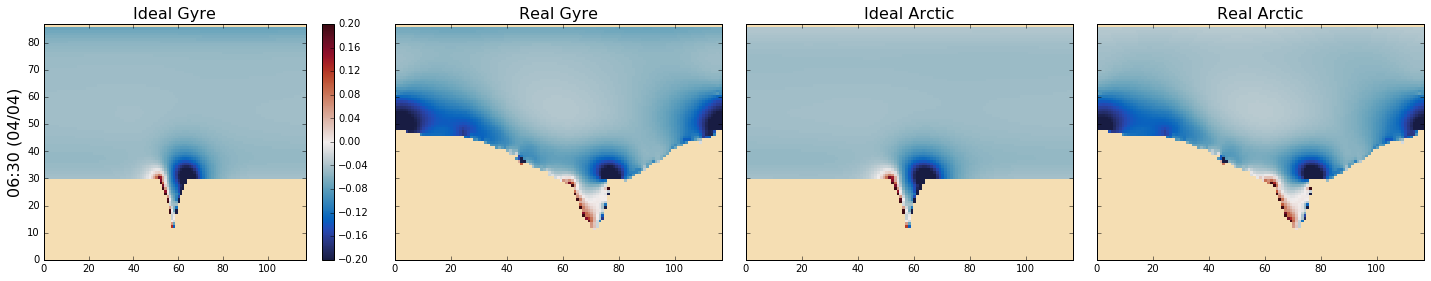

In [17]:
var_model = Us
max_min = True
bd = 0.2
fig = plot_scenarios(gridT_SR, var_model, time_ind, depth_ind, -bd, bd, cmaps, max_min, titles)

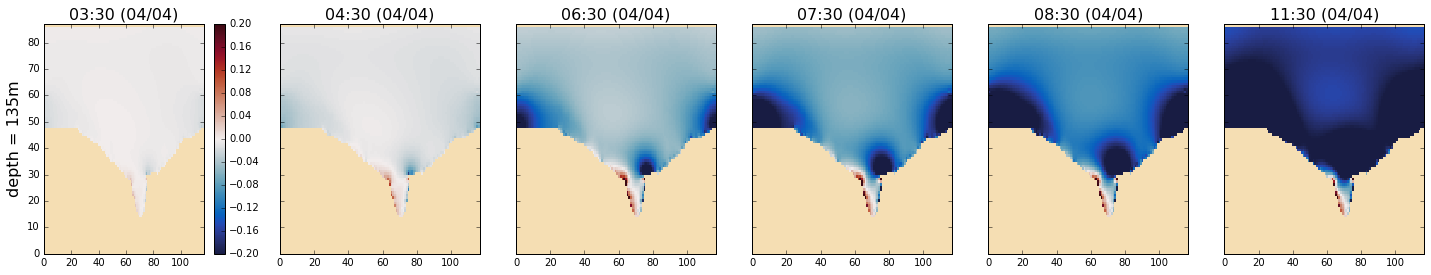

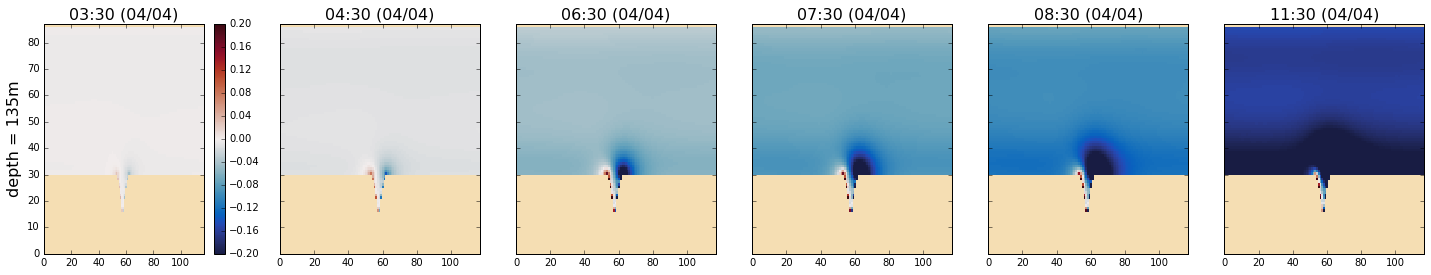

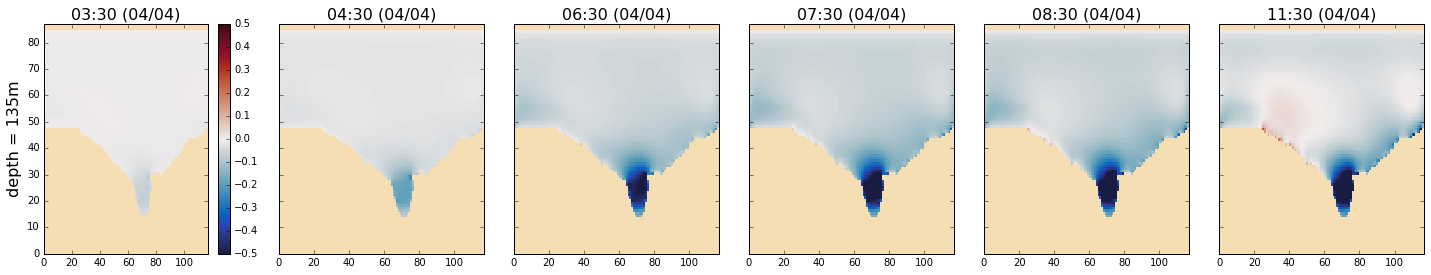

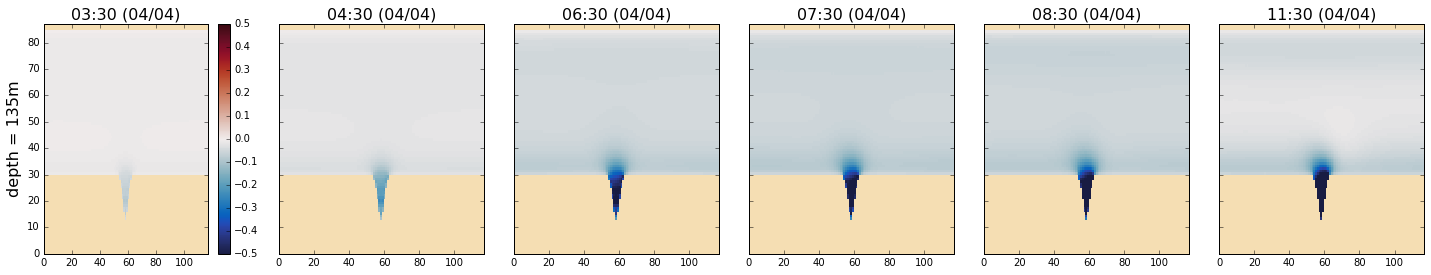

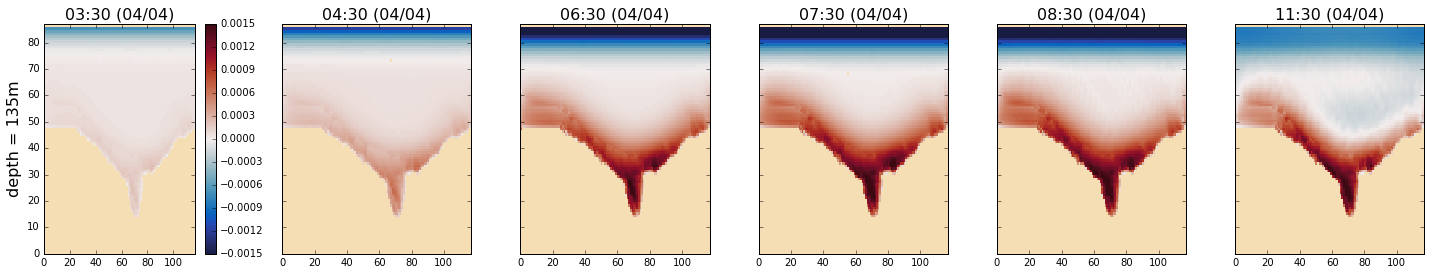

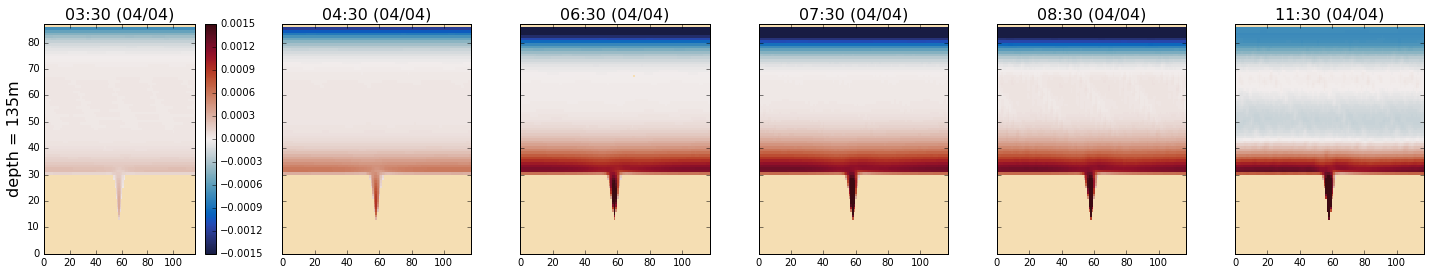

In [23]:
bd = 0.2
fig = plot_gyre_times(gridT_SR, U_SR, 9, time_inds, -bd, bd, cmo.cm.balance, max_min)
fig = plot_gyre_times(gridT_SI, U_SI, 9, time_inds, -bd, bd, cmo.cm.balance, max_min)
bd = 0.5
fig = plot_gyre_times(gridT_SR, V_SR, 9, time_inds, -bd, bd, cmo.cm.balance, max_min)
fig = plot_gyre_times(gridT_SI, V_SI, 9, time_inds, -bd, bd, cmo.cm.balance, max_min)
bd = 0.0015
fig = plot_gyre_times(gridT_SR, W_SR, 9, time_inds, -bd, bd, cmo.cm.balance, max_min)
fig = plot_gyre_times(gridT_SI, W_SI, 9, time_inds, -bd, bd, cmo.cm.balance, max_min)

# Run03: Lateral Boundary Conditions

### Notes
(Page 154 to 157) In namlbc:

| Parameter             | Description | Run01 | Run02 | Run03 |
|-----------------------|------------------------------------------------------------------|---|---|-----|
|rn_shlat|**free slip** = 0, 0 < **partial slip** < 2, **no slip** = 2, **strong slip** > 2| 2 | 2 | 0.5 |